In [1]:
import pandas as pd
import os

In [2]:
import warnings

warnings.filterwarnings('ignore')

data = None

for file in os.listdir('../dataset'):
    df = pd.read_csv(f'../dataset/{file}')
    df.drop(['SNo', 'Name','Volume','Marketcap'],axis=1,inplace=True)
    if data is not None:
        data = data.append(df, ignore_index=True)
    else:
        data = df

data.set_index(['Symbol', 'Date'], inplace=True)


In [7]:
train = data.loc["ETH"]["Close"]
train = train.iloc[:-60]
test = data.loc["ETH"]["Close"]
test = test.iloc[-60:]
print(train.shape, test.shape)

(2100,) (60,)


In [8]:
import random

pt = train.copy()

for i, x in train.items():
    p = random.uniform(-20, 20)
    pt[i] = x + (x*p)/100


pt1 = test.copy()

for i, x in test.items():
    p = random.uniform(-20, 20)
    pt1[i] = x + (x*p)/100


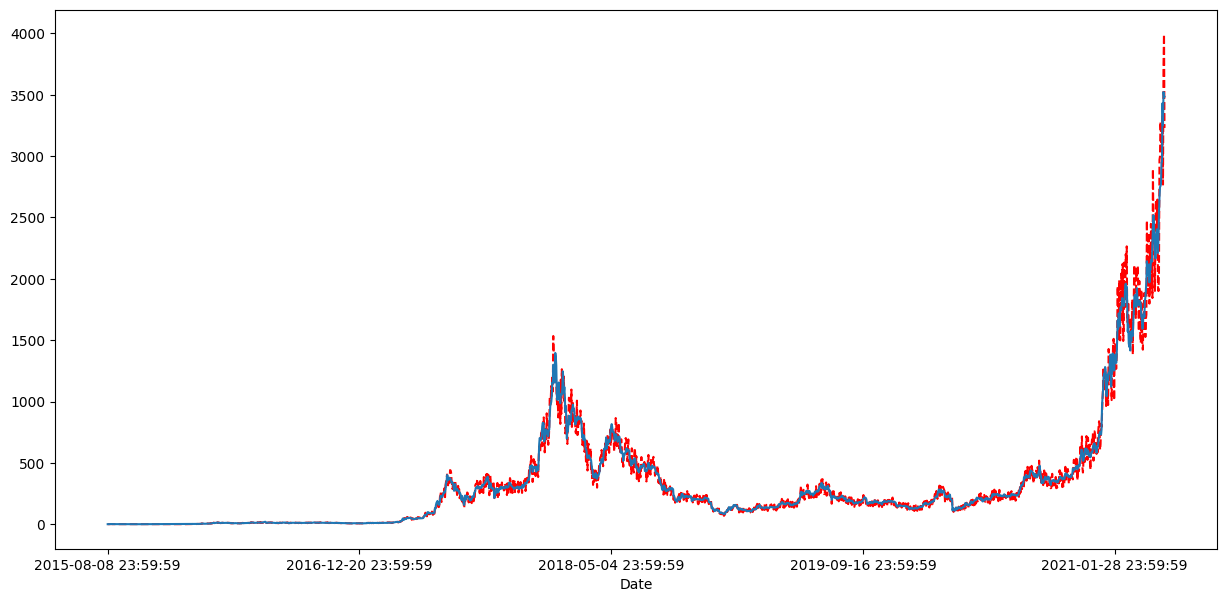

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
pt.plot(color='r', ls='--', label='forecast')
train.plot(label='actual')

plt.show()

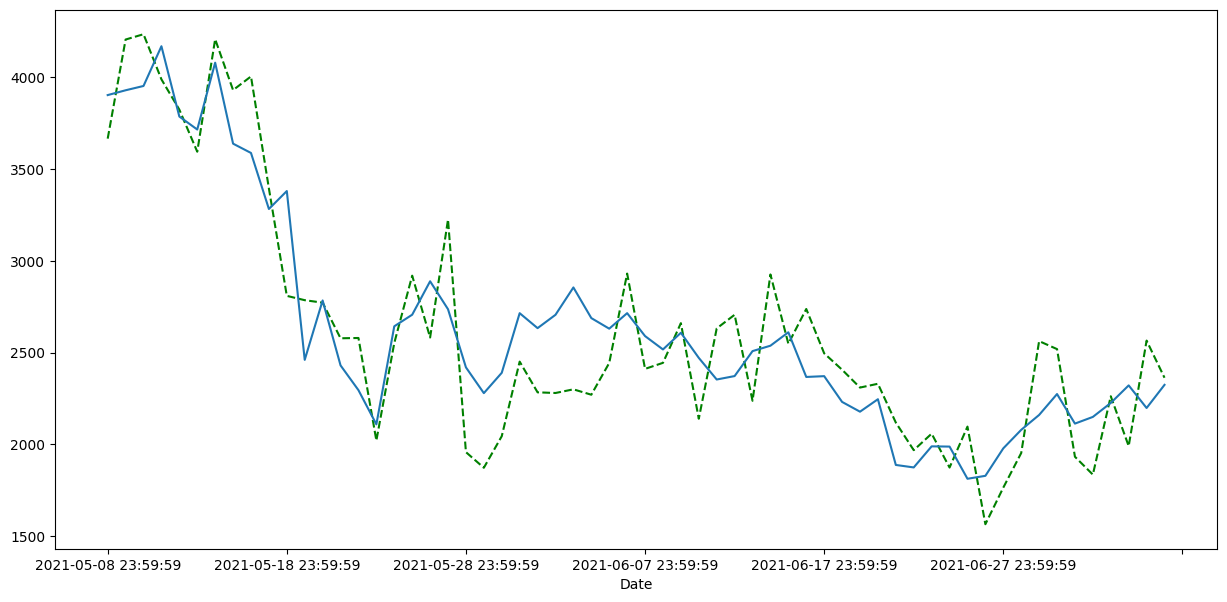

In [10]:
plt.figure(figsize=(15,7))
pt1.plot(color='g', ls='--', label='forecast')
test.plot(label='actual')

plt.show()

In [5]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product

warnings.filterwarnings('ignore')

qs = range(0, 3)
ps = range(0, 3)
d=1
parameters = product(ps, qs)
parameters_list = list(parameters)

results = []
best_aic = float("inf")
for param in parameters_list:
    try:
        model = SARIMAX(train, order=(param[0], d, param[1])).fit(disp=-1)
    except ValueError:
        print('bad parameter combination:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [6]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

  parameters           aic
8     (2, 2)  44733.703121
5     (1, 2)  44795.646942
7     (2, 1)  44796.186261
2     (0, 2)  44797.783309
6     (2, 0)  44798.318938


In [7]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2931
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -22361.852
Date:                Sat, 21 Jan 2023   AIC                          44733.703
Time:                        15:22:07   BIC                          44763.617
Sample:                    04-29-2013   HQIC                         44744.476
                         - 05-07-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2928      0.008    163.840      0.000       1.277       1.308
ar.L2         -0.8641      0.009    -98.420      0.000      -0.881      -0.847
ma.L1         -1.3103      0.006   -206.046      0.000      -1.323      -1.298
ma.L2          0.9340      0.007    132.752      0.000       0.920       0.948
sigma2      2.558e+05   1522.471    168.004      0.000    2.53e+05    2.59e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.70   Jarque-Bera (JB):            227555.82
Prob(Q):                              0.40   Prob(JB):                         0.00
Heteroskedasticity (H):             966.11   Skew:                             1.66
Prob(H) (two-sided):                  0.00   Kurtosis:                        46.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
print(test.head())
print(test.tail())

Date
2021-05-08 23:59:59    58803.775809
2021-05-09 23:59:59    58232.316142
2021-05-10 23:59:59    55859.797545
2021-05-11 23:59:59    56704.573058
2021-05-12 23:59:59    49150.533875
Name: Close, dtype: float64
Date
2021-07-02 23:59:59    33897.048590
2021-07-03 23:59:59    34668.548402
2021-07-04 23:59:59    35287.779766
2021-07-05 23:59:59    33746.002456
2021-07-06 23:59:59    34235.193451
Name: Close, dtype: float64


In [26]:
from datetime import datetime
from scipy.special import inv_boxcox

pred = inv_boxcox(best_model.predict(start=datetime(2021,5,8),end=datetime(2021,7,6)), 1.5)
pred

2021-05-08 23:59:59    1956.136067
2021-05-09 23:59:59    1962.998217
2021-05-10 23:59:59    1965.609354
2021-05-11 23:59:59    1963.062723
2021-05-12 23:59:59    1957.508464
2021-05-13 23:59:59    1952.523969
2021-05-14 23:59:59    1950.884427
2021-05-15 23:59:59    1953.075354
2021-05-16 23:59:59    1957.320907
2021-05-17 23:59:59    1960.914385
2021-05-18 23:59:59    1961.894623
2021-05-19 23:59:59    1960.058413
2021-05-20 23:59:59    1956.835367
2021-05-21 23:59:59    1954.254354
2021-05-22 23:59:59    1953.704445
2021-05-23 23:59:59    1955.224445
2021-05-24 23:59:59    1957.663385
2021-05-25 23:59:59    1959.502705
2021-05-26 23:59:59    1959.774210
2021-05-27 23:59:59    1958.536154
2021-05-28 23:59:59    1956.700236
2021-05-29 23:59:59    1955.396437
2021-05-30 23:59:59    1955.297891
2021-05-31 23:59:59    1956.297174
2021-06-01 23:59:59    1957.673775
2021-06-02 23:59:59    1958.589980
2021-06-03 23:59:59    1958.585299
2021-06-04 23:59:59    1957.787577
2021-06-05 23:59:59 

In [27]:
pred.head()

2021-05-08 23:59:59    1956.136067
2021-05-09 23:59:59    1962.998217
2021-05-10 23:59:59    1965.609354
2021-05-11 23:59:59    1963.062723
2021-05-12 23:59:59    1957.508464
Freq: D, Name: predicted_mean, dtype: float64

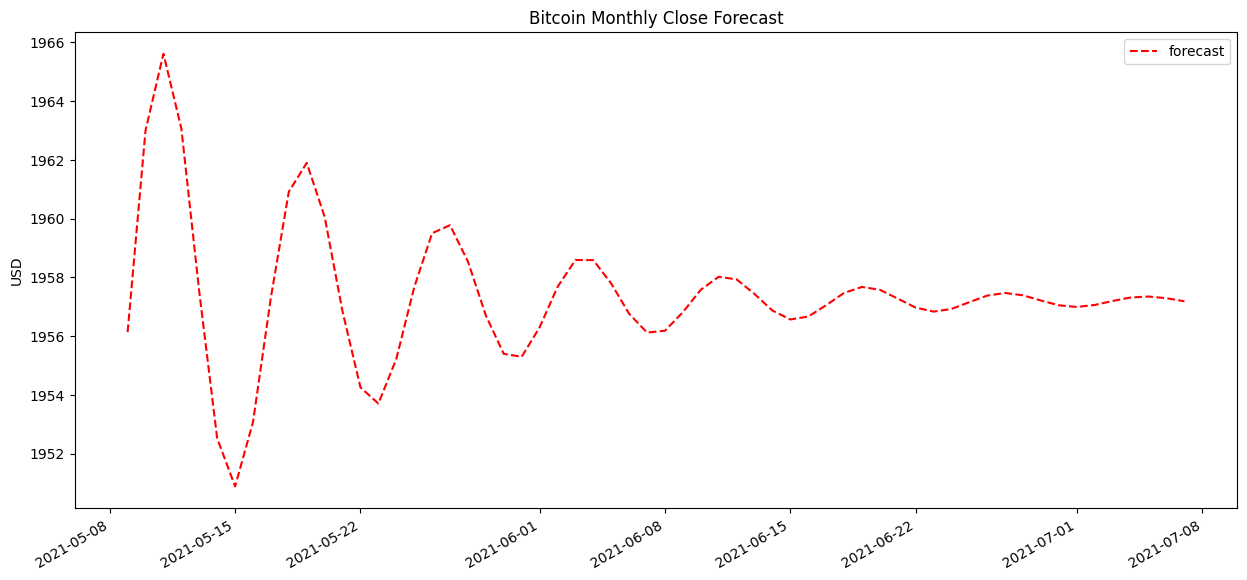

In [29]:


plt.figure(figsize=(15,7))
# test.plot()
pred.plot(color='r', ls='--', label='forecast')
plt.legend()
plt.title('Bitcoin Monthly Close Forecast')
plt.ylabel('USD')
plt.show()